<a href="https://colab.research.google.com/github/firaz-thakur/SEOUL-BIKE-SHARING-DEMAND-PREDICTION/blob/main/Supervised_ML_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Seoul Bike Sharing Demand Prediction**

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Firaz Thakur**


# **Project Summary -**

##Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it reduces waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


#**Data Description :**

##The dataset contains weather information such as Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall, the number of bikes rented per hour and date information.

#  **Attribute Information :**

* ## Rented Bike count - Count of bikes rented at each hour

* ## Seasons - Winter, Spring, Summer, Autumn
* ## Temperature-Temperature in Celsius
* ## Dew point temperature - Celsius
* ## Solar radiation - MJ/m2
* ## Date : year-month-day

* ## Hour - Hour of he day

* ## Humidity - %

* ## Windspeed - m/s

* ## Visibility - 10m


* ## Rainfall - mm
* ## Snowfall - cm




* ## Holiday - Holiday/No holiday

* ## Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


# **GitHub Link -**

# **Problem Statement**



##Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes using the values in the other columns.With the help of historical datas ,we should be able to estimate the bike count required at each hour.

# ***Let's Begin !***

# ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing all the libraries that are required for Analysis :

import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime 
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings("ignore")


### Dataset Loading 

In [2]:
# Mounting Google Drive : 
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Creating Path for Data :
data = pd.read_csv("/content/drive/MyDrive/Data Science (Alma Better)/Machine learning (Module 4)/Linear Regression/CAPSTONE PROJ - LINEAR REGRESSION/SeoulBikeData.csv", encoding="latin1")
df = pd.DataFrame(data)

### Dataset First View

In [5]:
# Dataset First Look :
# Checking top 5 Rows :
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Last 5 Rows :
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count :
df.shape
print (f'The Total numbers of Rows and Columns are {df.shape} ')

The Total numbers of Rows and Columns are (8760, 14) 


### Dataset Information

In [8]:
# Dataset Info :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values
* #### Why do we need to remove duplicate values ?
#### Duplicate values are caused due to the error of data collection or during data entry. By removing the duplication from the data set we will refine the data and make our model more sustainable.

In [9]:
# Dataset Duplicate Value Count :
print(len(df[df.duplicated()]))

0


 #### there is no duplicate value in our data set.

### Missing Values/Null Values 
* #### Why do we need to handle missing values ? 
#### Since, real world data has lot of missing values in it. The casue of missing values can be data corruption or missing information.Handling of the missing values is more important as many machine algorithm does not support missing values and our model can fail or mislead us.
#### So,our first priority is to deal with this missing values.




In [10]:
# Missing Values/Null Values Count :
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

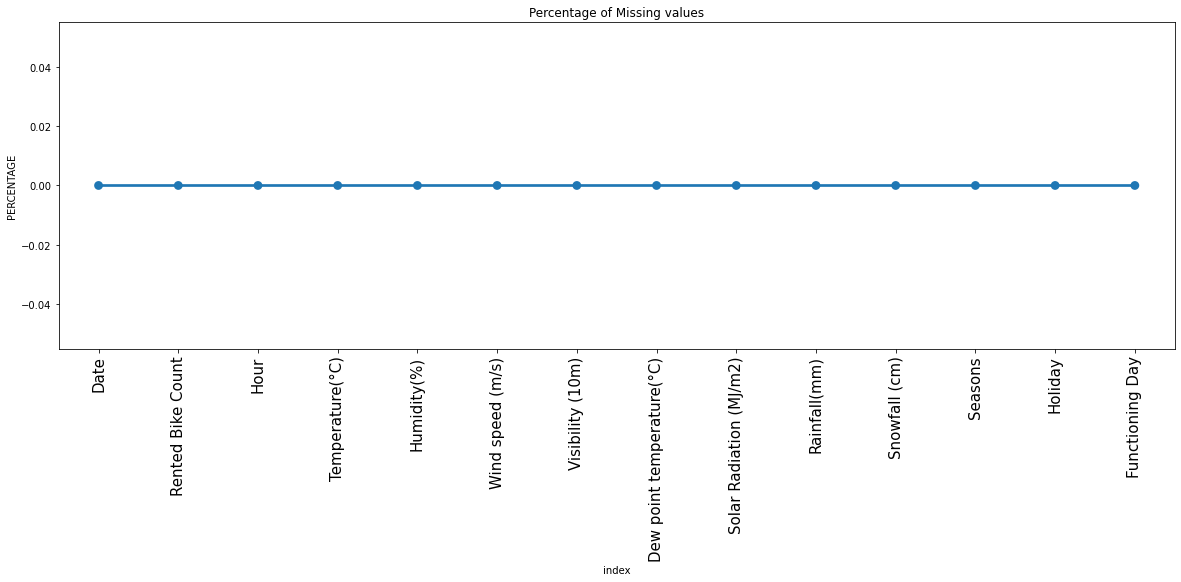

In [11]:
# Visualizing the missing values :
missing_data = df.isnull().sum()
missing_data = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(20,6))
ax = sns.pointplot('index',0,data=missing_data)
plt.xticks(rotation =90,fontsize =15)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

#### From the above graph it is clearly shown that, there is no Null values present in the data set.


### What did you know about your dataset?

The dataset contains 8760 rows and 14 columns.
Looks like "Seasons", "Holiday", "Functioning Day" are strings (possibly categories) and rest columns are numerical data. None of the columns contain any missing values and duplicate values which saves us a fair bit of work!

# ***2. Understanding Your Variables***

In [12]:
# Dataset Columns :
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [13]:
# Dataset Describe :
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Features Description.

**Breakdown of Our Features:**

**Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count** : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C)**: Temperature in Celsius, type : Float

**Humidity(%)**: Humidity in the air in %, type : int

**Wind speed (m/s)** : Speed of the wind in m/s, type : Float

**Visibility (10m)**: Visibility in m, type : int

**Dew point temperature(°C)**: Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2)**: Sun contribution, type : Float

**Rainfall(mm)**: Amount of raining in mm, type : Float

**Snowfall (cm)**: Amount of snowing in cm, type : Float

**Seasons**: Season of the year, type : str, there are only 4 season's in data. 

**Holiday**: If the day  is holiday period or not, type: str

**Functioning Day**: If the day is a Functioning Day or not, type : str


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable :
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

# ***3.Data Wrangling*** 

### ***Renaming the columns name :***
* #### Why do we need to rename the coulmn name?
#### We rename the column name just to make it more readable in the data set for better understanding.




In [15]:
# Renaming the Columns names and then checking the updated data set :
df = df.rename(columns={'Rented Bike Count': 'Rented_Bike_count', 'Hour': 'Hour','Temperature(°C)': 'Temperature', 'Humidity(%)': 'Humidity', 
                   'Wind speed (m/s)': 'Wind_speed','Visibility (10m)': 'Visibility', 'Dew point temperature(°C)': 'Dew_point_temperature',
                   'Solar Radiation (MJ/m2)': 'Solar_Radiation', 'Rainfall(mm)': 'Rainfall',
                   'Snowfall (cm)': 'Snowfall','Seasons': 'Seasons', 'Holiday': 'Holiday', 'Functioning Day': 'Functioning_day'})

In [16]:
# Checking the updated df :
df.head()

,Date,Rented_Bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## **Extracting Date, Month, Year from Date column :**
#### Since, python read "Date" column as a object type ( i.e. it reads as a string). As the date column is very important to analyze the users behaviour,
####So we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.



In [17]:
# We are extracting some extra columns to get more meaningful insights :
df['Date'] = df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [18]:
# Computing year :  
df['Year'] = df['Date'].dt.year
# Computing month : 
df['Month'] = df['Date'].dt.month
# Computing day :
df['Day'] = df['Date'].dt.day_name()

*  We have convert the "Date" column into 3 different column i.e "Year","Month" and "Day" :
*  The "Year" column : contains the 2 unique numbers, details from 2017 december to 2018 november.So if i consider this a year then we don't need this column, so we can drop it.
*  The "Day" column : it contains the details about the each day of the month, considering day wise data is too long, so we concise this data into a day is a weekday or a weekend.
*  We convert it into this format and drop the "day" column.

In [19]:
# Creating a new column of "weekdays_weekend" :
df['weekdays_weekend']=df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
# Dropping the columns : "Date","Day","Year" : 
df=df.drop(columns=['Date','Day','Year'],axis=1)

In [20]:
# It always a good practice whatever code u execute, print and check it :
df.head()

,Rented_Bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [21]:
# Let's Check the info of the new columns :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [22]:
df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

# ***4. Exploratory Data Analysis and Visualization :*** ***Understand the relationships between variables*** 




* ## **Why do we perform EDA?**
 
 ## An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns and relationships that are not readily apparent.

## **Let's Separate the data :**

* ### Before proceeding with the distribution check ,let's first split the data into 2 lists (i.e. numericals and categoricals) for better understanding.




### **Analyzing Categorical Data :**

* ### **What is Categorical data?**
#### The data which takes a limited number of possible values and need not to be in numerical form, it can be textual in nature.
#### It includes data type such as object and other category.

In [23]:
# List of categorical_variables :
categorical_columns=list(df.select_dtypes(['object','category']).columns)
categorical_features=df[categorical_columns]
categorical_features.head()

,Seasons,Holiday,Functioning_day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [24]:
# Analyzing some patterns between dependent variables and categorical variables.
# Since, our dependent variable is "Rented_Bike_count".So we need to analysis this column with the other columns by using some visualisation plot to get more insights.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Season ')]

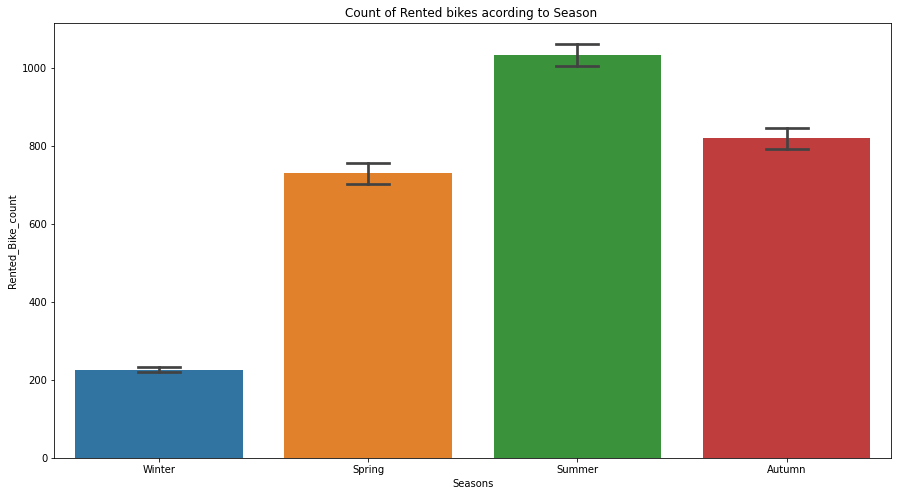

In [25]:
# Season v/s Bike_count :
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Season ')

**Observations :**

*   Summer and Autumn has the highest count of rented bikes compared to other sessons of the year.


* Winter has the least count of rented bikes as compared to other wheathers.





[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

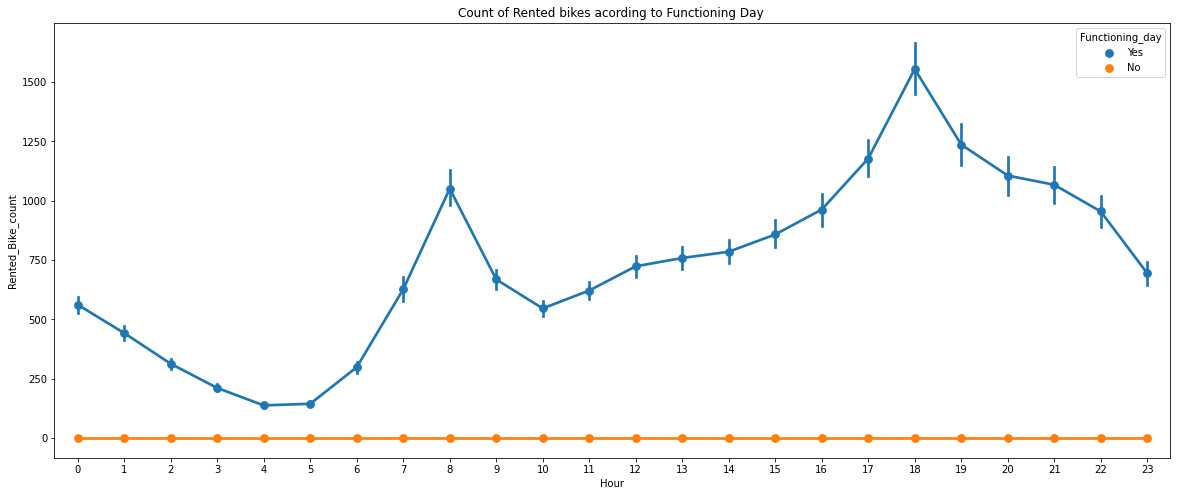

In [26]:
# Functioning_day v/s Bike_count graph :
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_count',hue='Functioning_day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

**Observations :**

*  From the graph it has been clear that the count of rented bikes is '0' on non-working day , only on the working days rented bikes had been hired.



[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

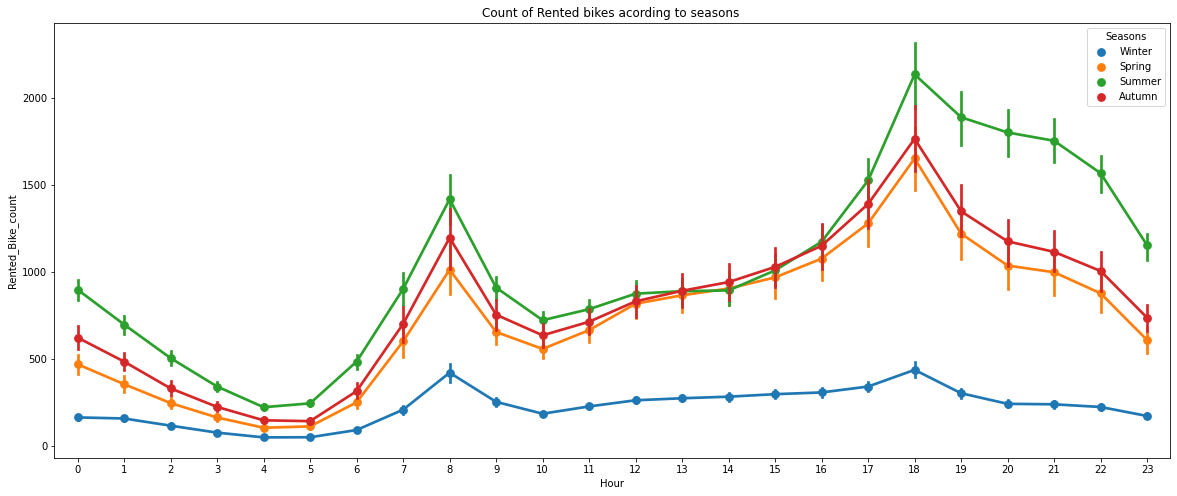

In [27]:
# Season v/s Hour v/s the bike counts :
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

**Observations :**

* Which ever be the sesson the peak hours of the rented bikes remains the same i.e. 8 am and 6 pm throught the 365 days.

*   Summer sesson being the highest number of count of rented bikes while winter being the lowest, snowfall can be the major reason for the decrease in the number of rented bikes during winter.





[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

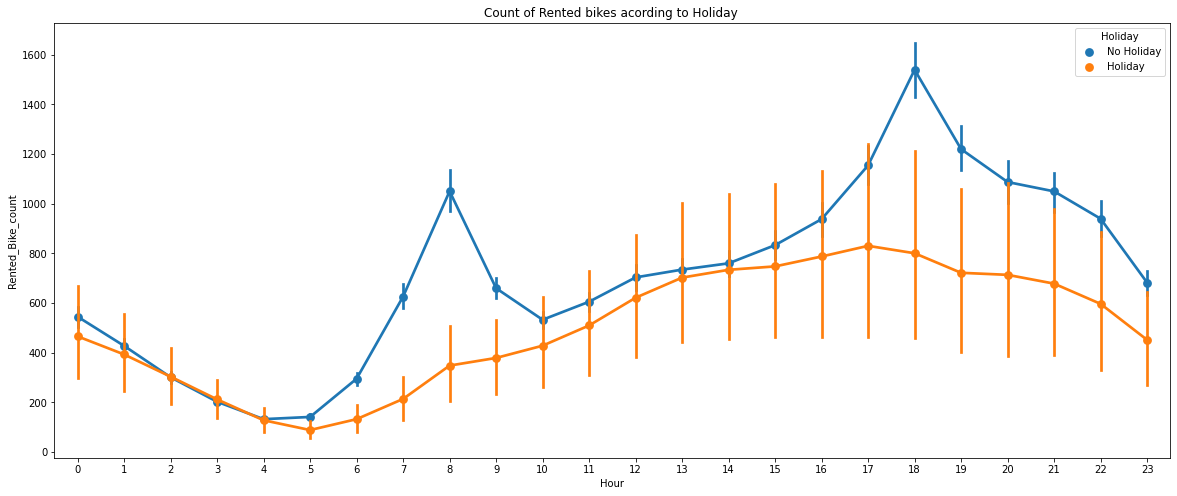

In [28]:
# Holiday v/s bike counts v/s Hour :
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

**Observations :**

*   Plot shows that in holiday, people uses the rented bike.

*   From 2pm-8pm the usage of the rented bikes is the highest.







### **Analyzing Numerical Data :**

* ### **What is Numerical data?**
#### Data which is expressed in numbers rather than natural language processing description. numerical data differentiates itself from other numbers in the form of data types (i.e. float64 and int64) with its ability to carry out arithmetic operations with these numbers.


In [29]:
# List of numerical variables :
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=df[numerical_columns]
numerical_features.head()


,Rented_Bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0


**Since numerical data consist of 2 variables i.e. (discrete values and continous values.)**

In [30]:
# Lets analyse the discrete values by creating histograms to understand the distribution :
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<32]
print(discrete_feature)

['Hour', 'Month', 'weekdays_weekend']


[Text(0.5, 1.0, 'Count of Rented bikes according to Months')]

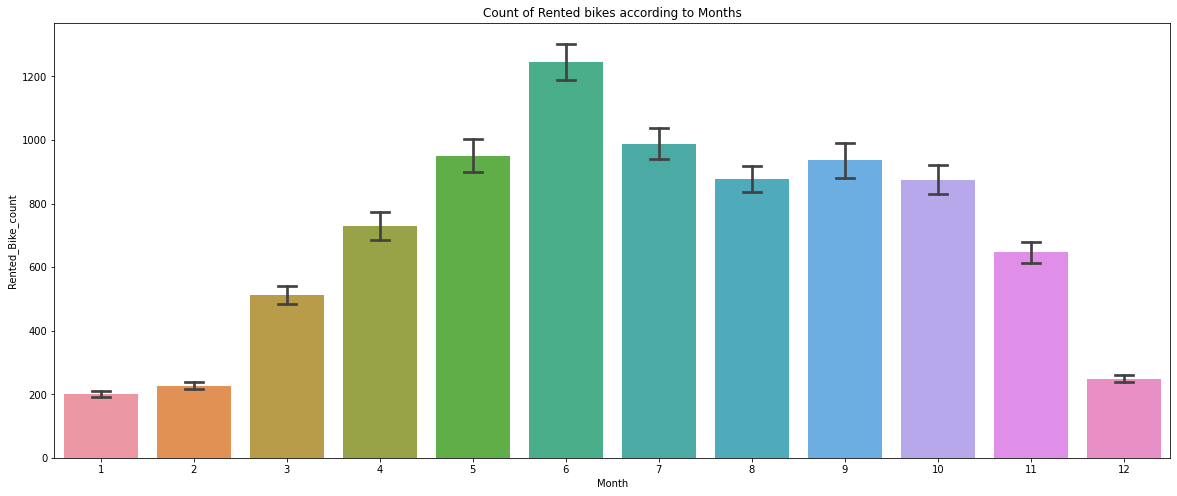

In [31]:
# Month v/s Rented_Bike_count graph :
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Month',y='Rented_Bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Months')

**Observations :** 
 
 from the bar plot graph we can clearly say :-
*  The highest months during which the count of rented bike is most is 6 (i.e.june), followed by 5 and 7 months (i.e. may and july)
* The count of rented bikes is least during the starting of the month and end of the month. (i.e. january , february and december)  



[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

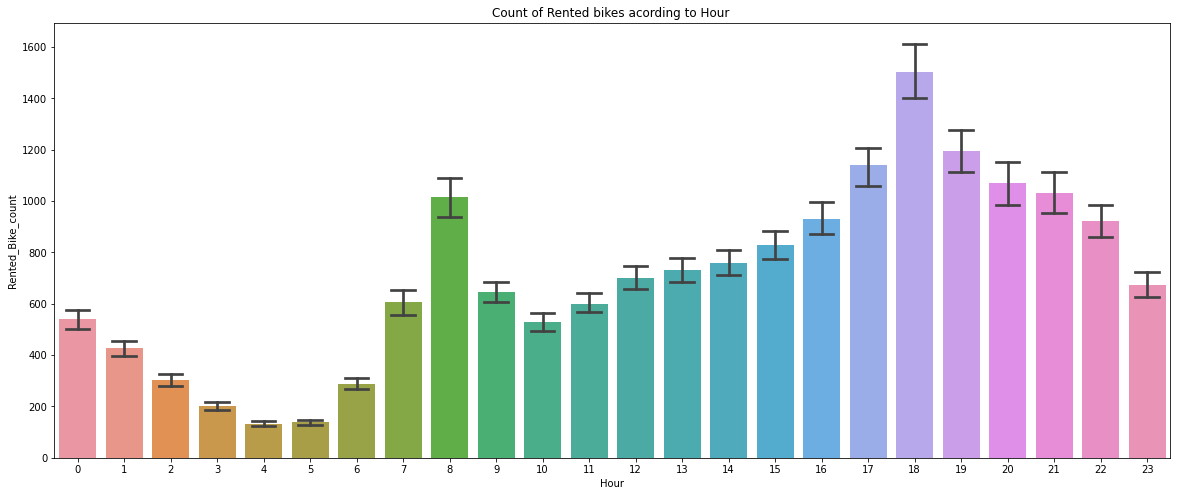

In [32]:
# Hour v/s Rented_Bike_count graph :
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Rented_Bike_count',ax=ax,capsize=.5)
ax.set(title='Count of Rented bikes acording to Hour ')

**Observations :**


* The highest number of count of rented bikes are at 8 am and 6 pm. This timings are considered as peak timings. 

* From 6 - 9 pm the count of rented bikes are more as compared to any other timings of the day.









[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

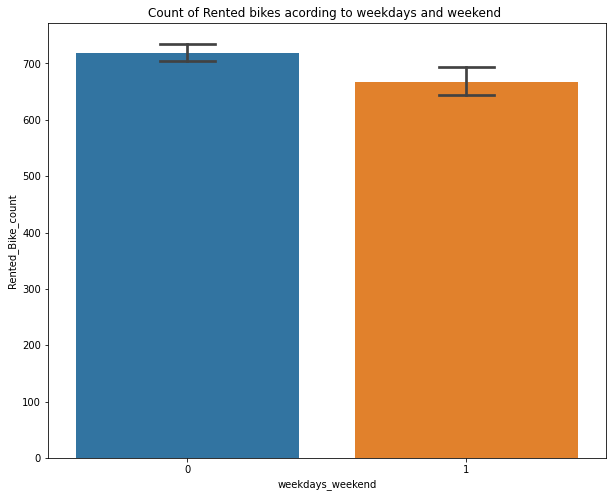

In [33]:
# weekdays_weekend v/s Rented_Bike_count graph :
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays_weekend',y='Rented_Bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

In [34]:
# Lets analyse the Continuous values :
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print(continuous_feature)

['Rented_Bike_count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']


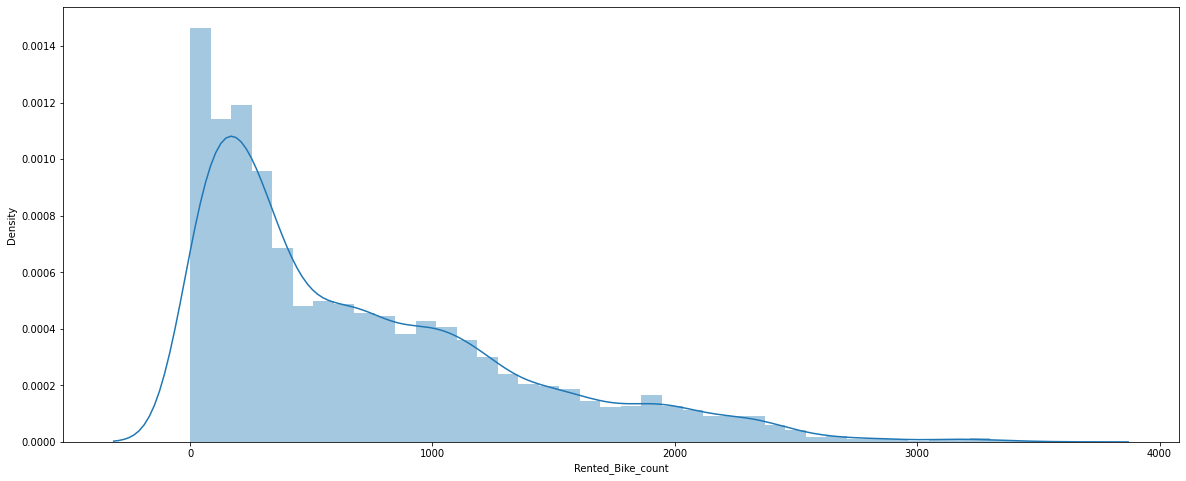

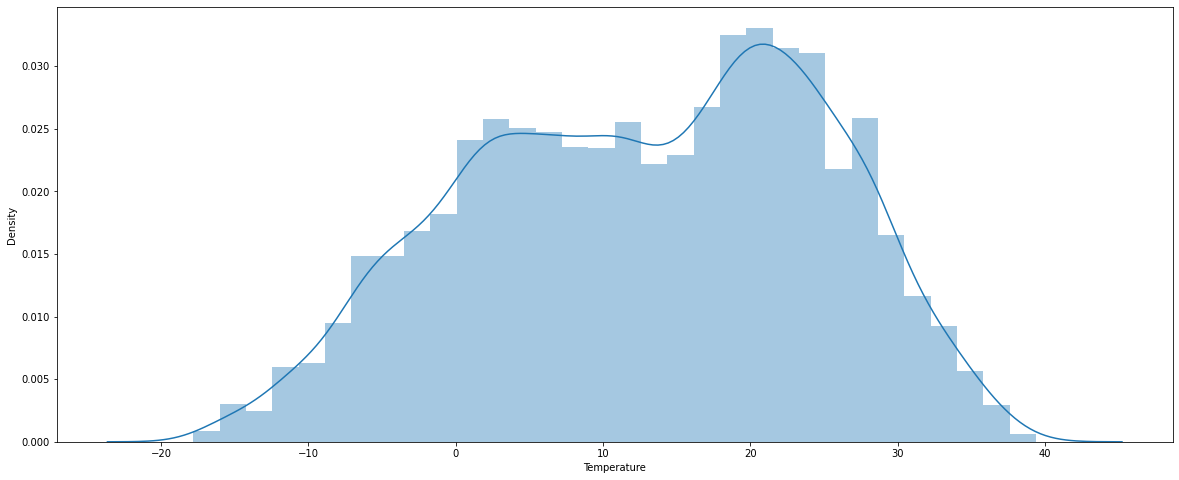

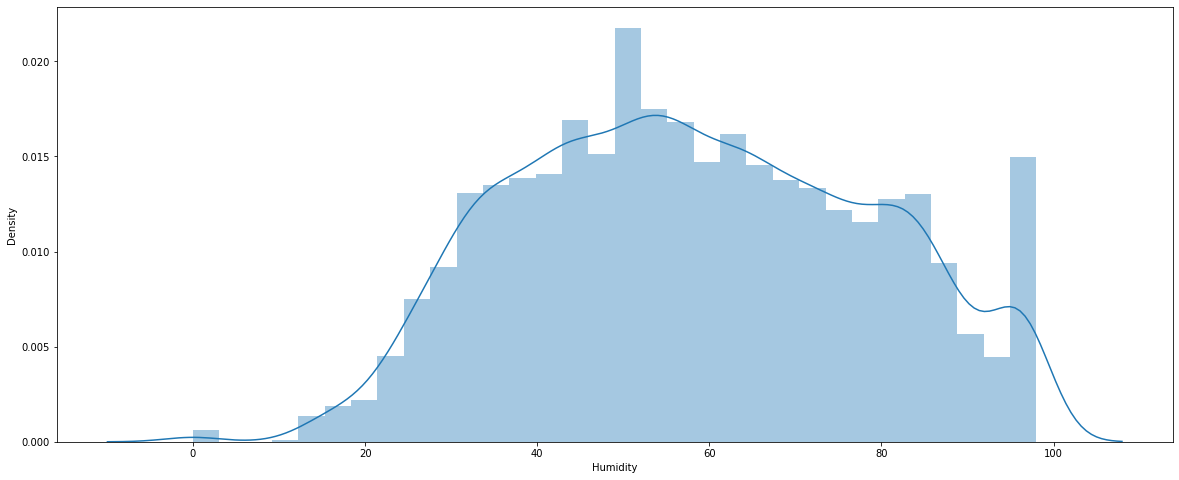

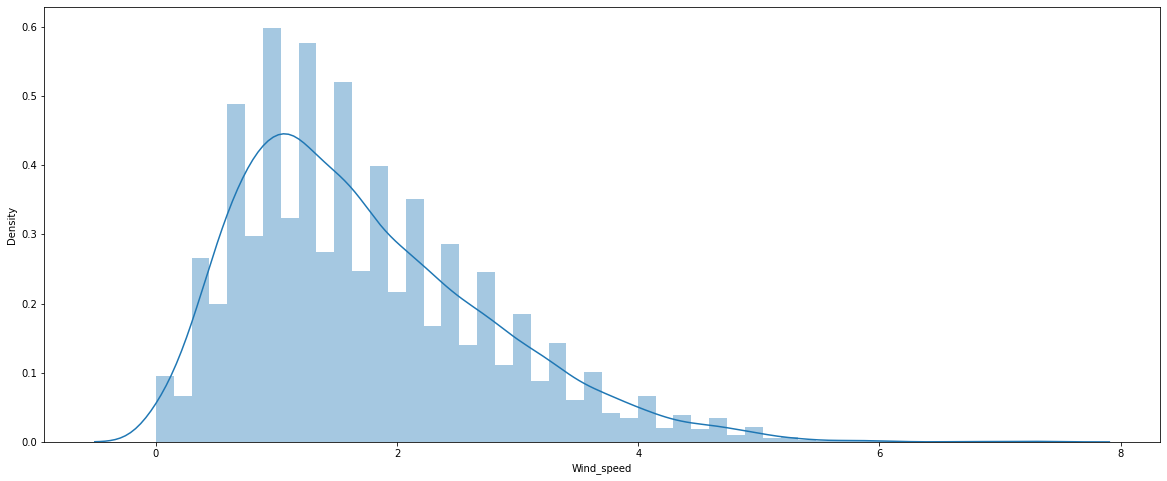

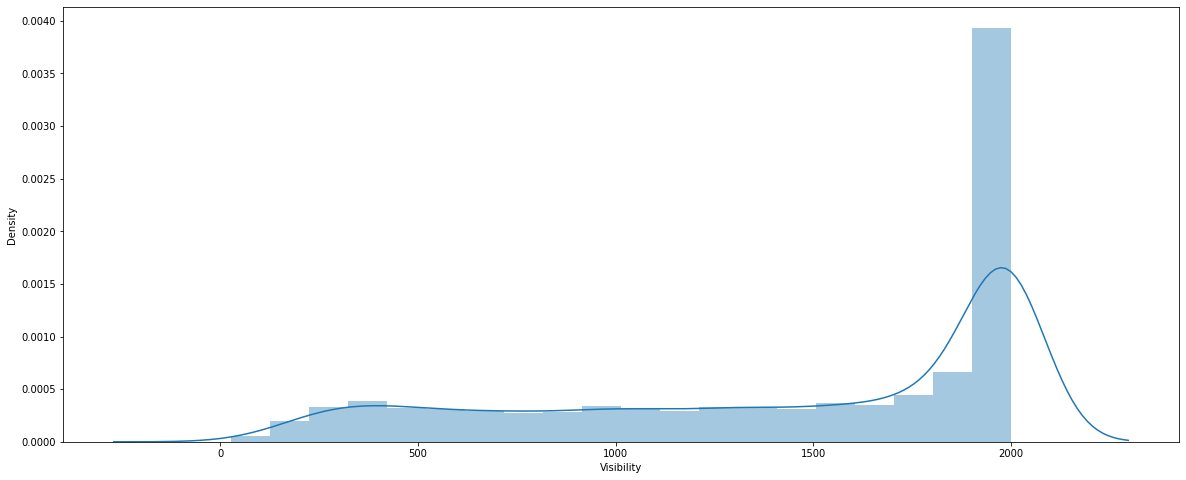

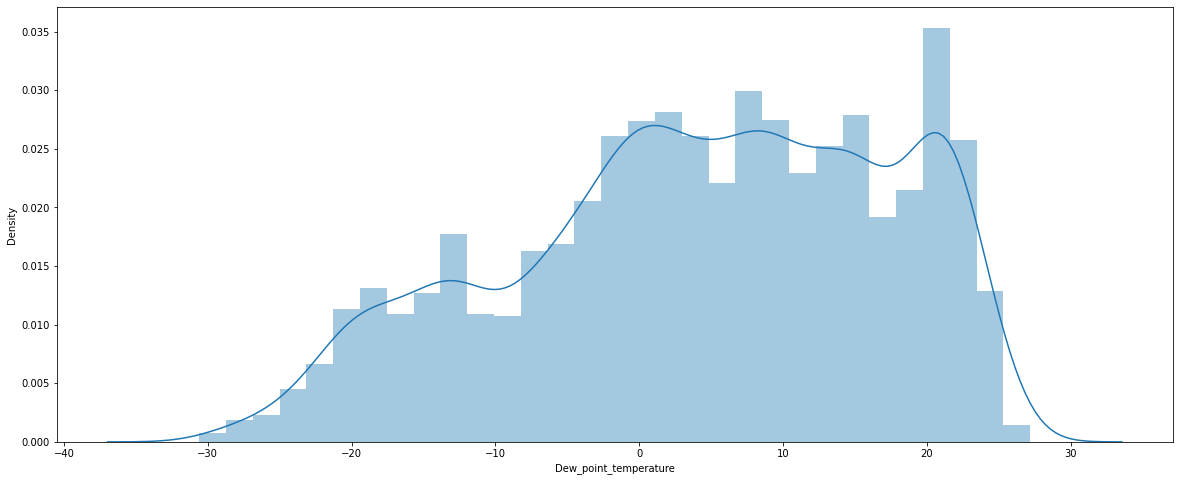

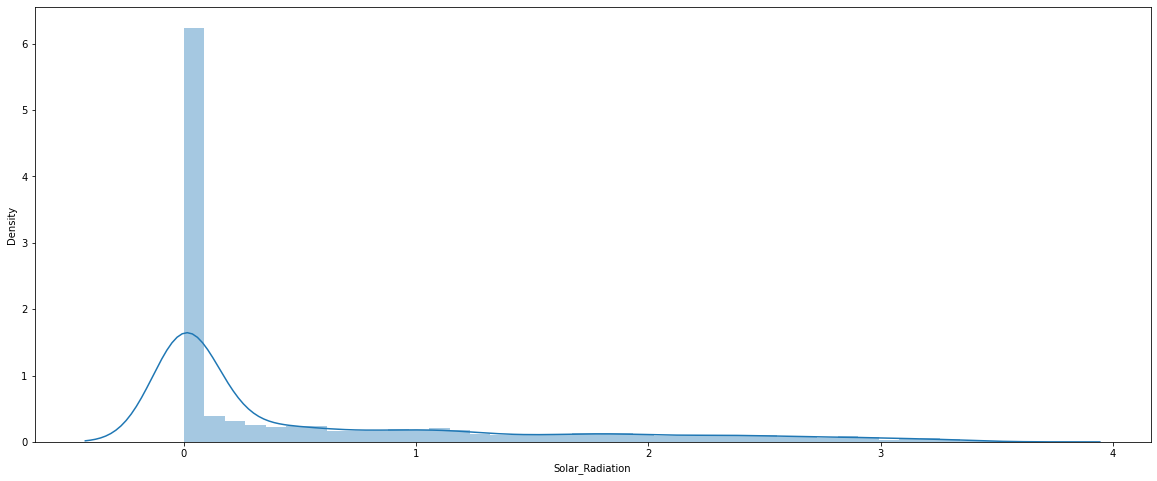

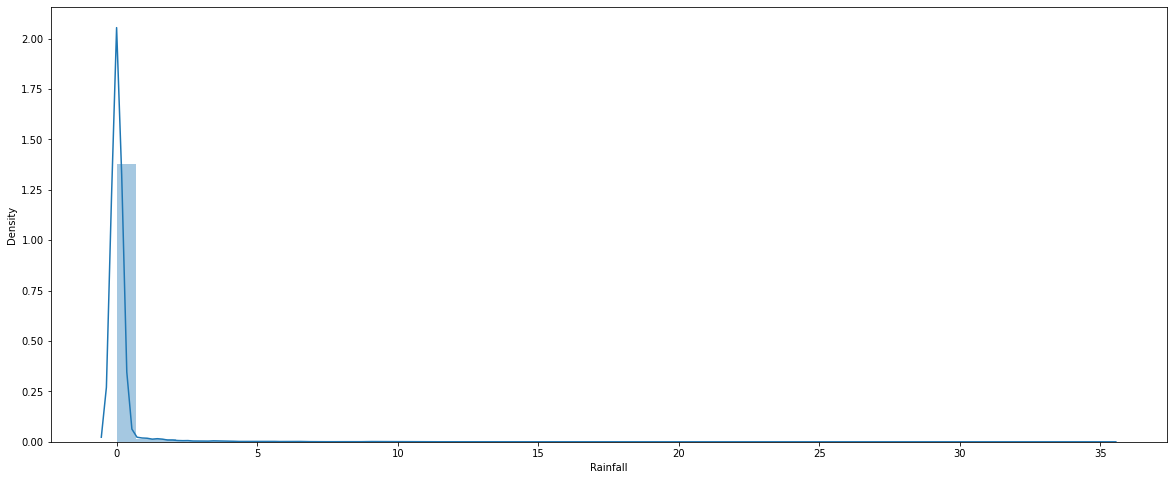

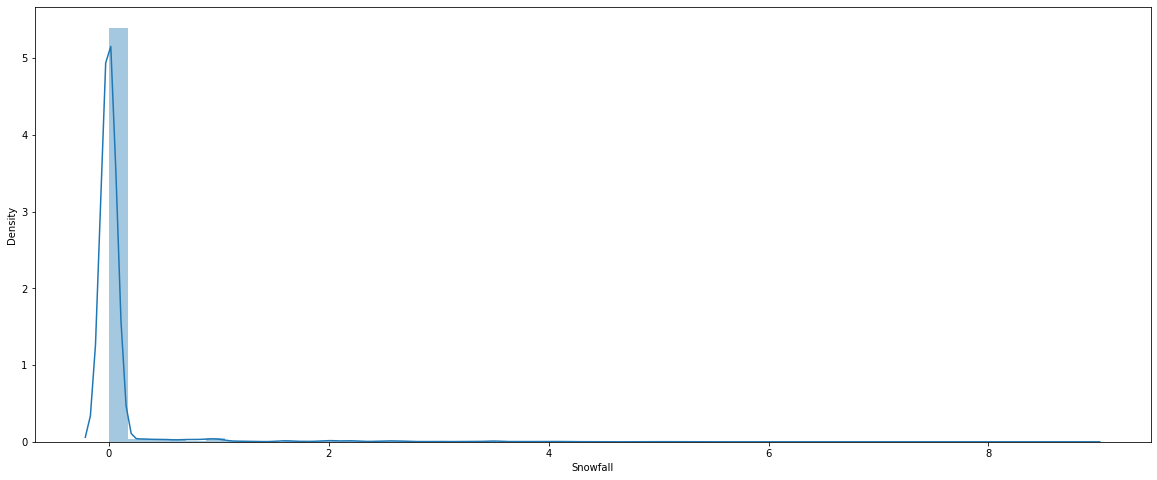

In [35]:
# Visualization displots to analyze the distribution of all continuous features :
for col in continuous_feature :
  plt.figure(figsize=(20,8))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

Text(0.5, 0, 'temp')

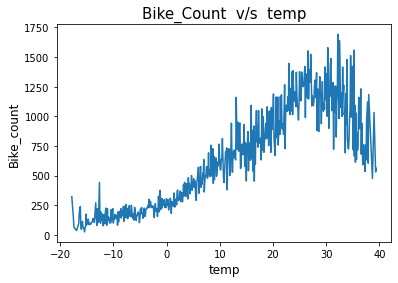

In [36]:
# Analyzing the relationship between "Bike_Count" and "Temperature" :
df.groupby('Temperature').mean()['Rented_Bike_count'].plot()
plt.title("Bike_Count  v/s  temp",fontsize=15)
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('temp',fontsize=12)

**Observations :**

*   People like to ride bikes when it is pretty hot around 25°C in average, due to which the count of rented bikes is more at this temperature.



Text(0.5, 0, 'Snow')

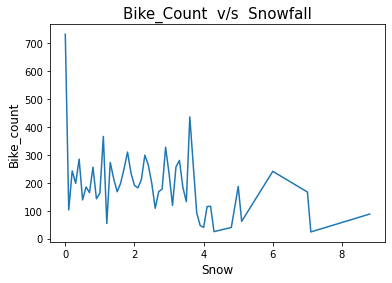

In [37]:
''' Finding out whether snowfall can be the major reason for decrease in count of rented bikes during winter.'''
# Analyzing the relationship between "Bike_Count" and "Snowfall" :
df.groupby('Snowfall').mean()['Rented_Bike_count'].plot()
plt.title("Bike_Count  v/s  Snowfall",fontsize=15)
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('Snow',fontsize=12)

**Observations :**

*   Although the count of rented bikes in winter is less when compared to other wheathers but as soon as the snowfall reaches beyond 4cm there has been an drastic drop in the count of rented bikes.

*   From this we can easily predict that snowfall plays a major role in the count of rented bikes .





Text(0.5, 0, 'Rain')

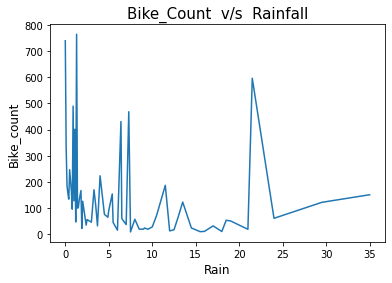

In [38]:
''' Checking whether increase in the rainfall can decrease the count of rented bikes. '''
# Analyzing the relationship between "Rented_Bike_Count" and "Rainfall" :
df.groupby('Rainfall').mean()['Rented_Bike_count'].plot()
plt.title("Bike_Count  v/s  Rainfall",fontsize=15)
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('Rain',fontsize=12)

**Observations :**

* We can see from the above graph that even if it rains heavily the demand of the rent bikes is not decreasing drastically,for example even there is a drop in rented bikes between 10-15 mm rainfall but at 20 mm of rain there is an big hike again for rented bikes.

* So we can conclude that rainfall does not affect the number of the rented bikes much.





Text(0.5, 0, 'Wind')

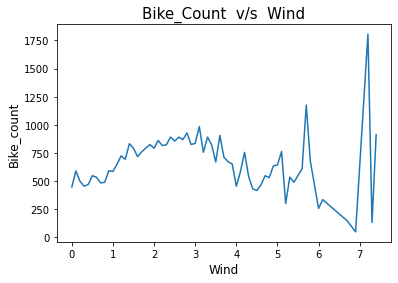

In [39]:
# Analyzing the relationship between "Bike_Count" and "Wind" :
df.groupby('Wind_speed').mean()['Rented_Bike_count'].plot()
plt.title("Bike_Count  v/s  Wind",fontsize=15)
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('Wind',fontsize=12)

**Observations :**

*  We can see from the above graph that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.


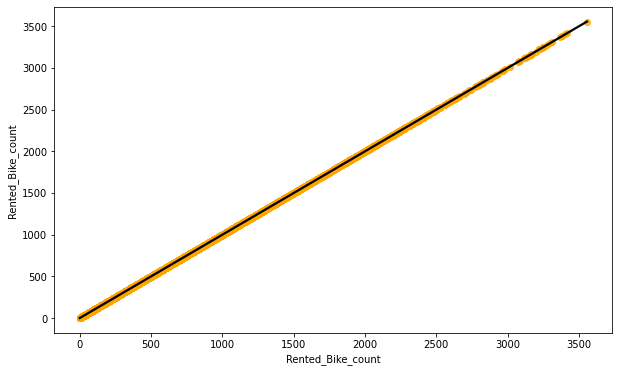

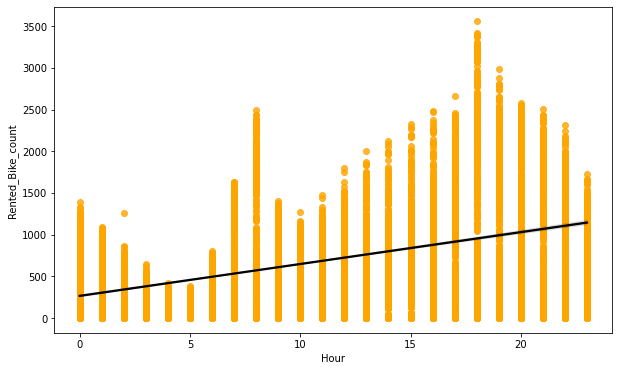

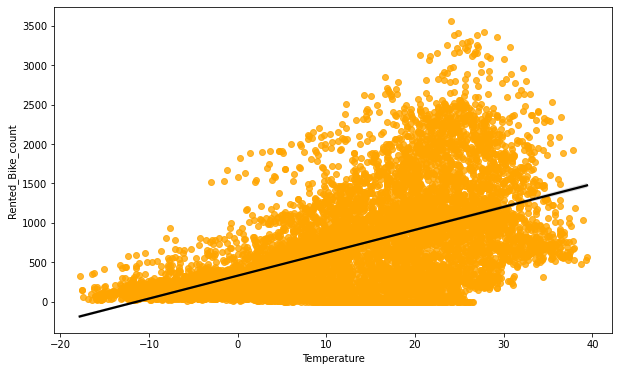

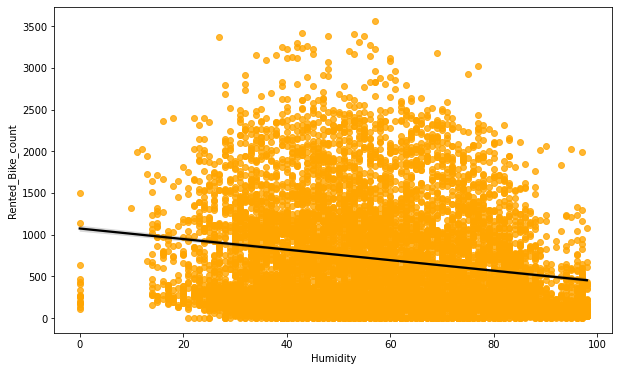

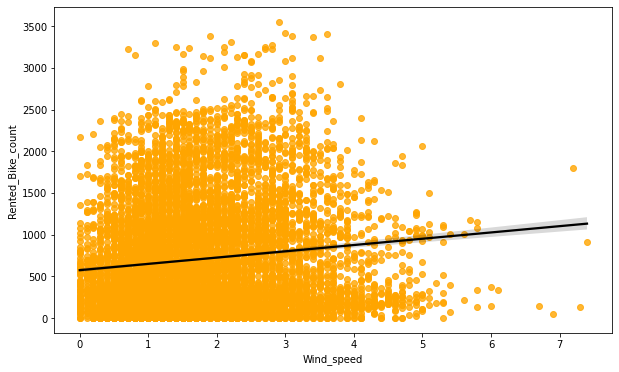

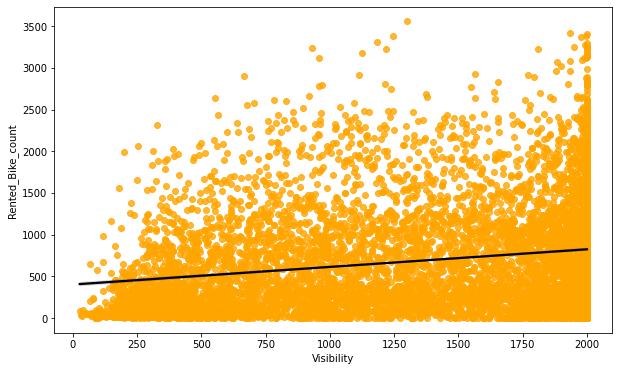

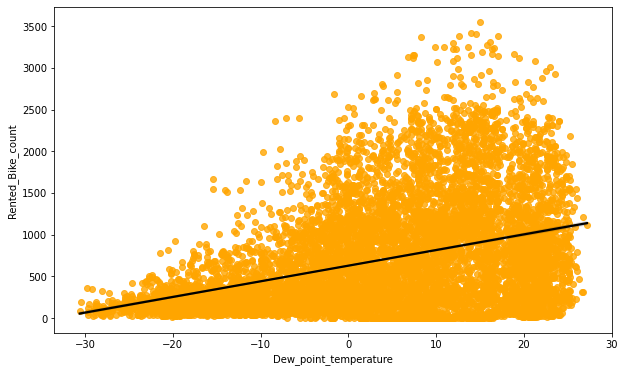

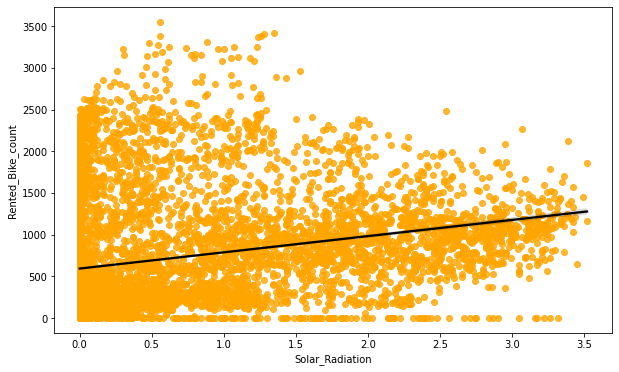

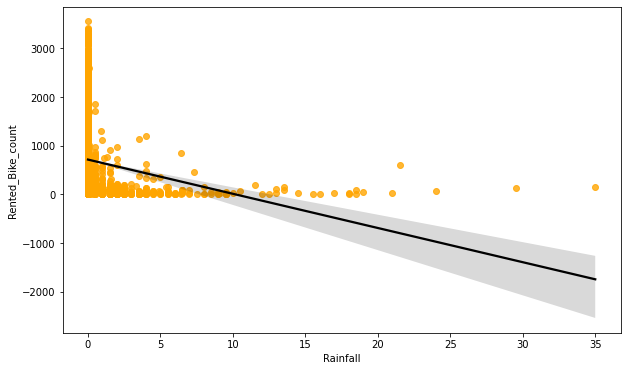

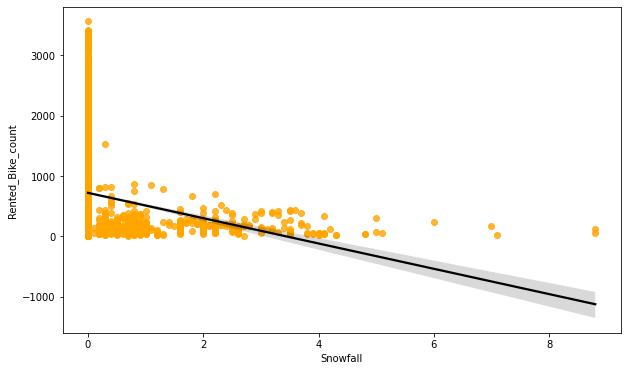

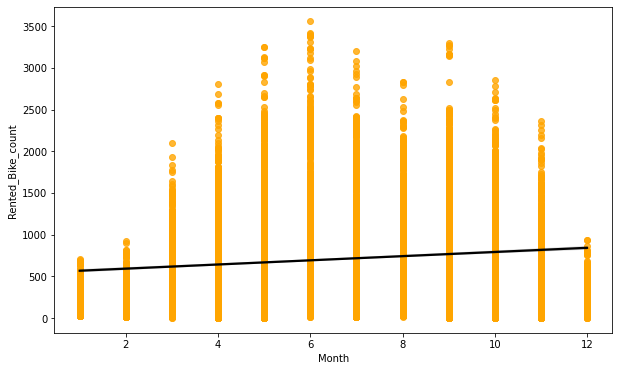

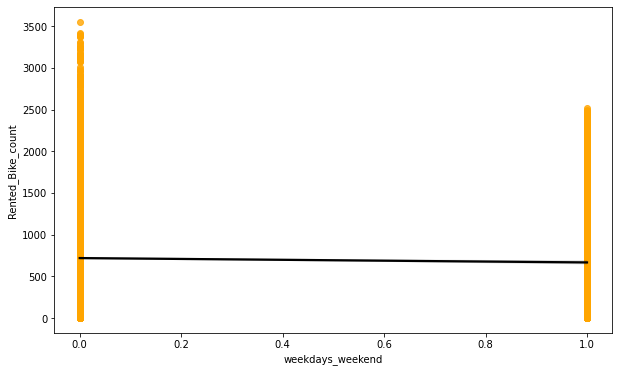

In [40]:
# Visualizing the regression plot for all the numerical features :
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x= df[col],y= df['Rented_Bike_count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

**Observations :**
* From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.
* Which means the rented bike count increases with increase of these features.
* 'Rainfall', 'Snowfall', 'Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.

## **Normalization of dependent variables :**

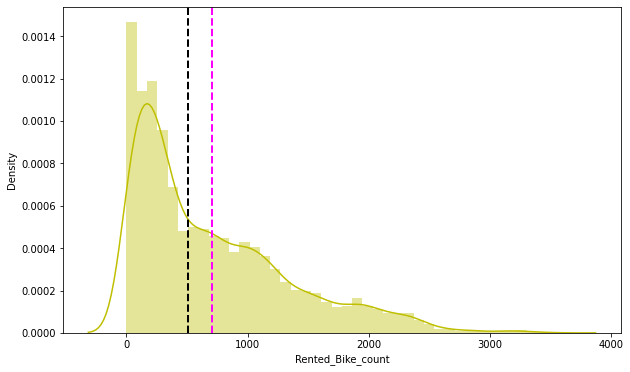

In [41]:
# Distribution plot of Rented Bike Count :
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_count'],hist=True ,color="y")
ax.axvline(df['Rented_Bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented_Bike_count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* **The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.**

In [42]:
# Checking the skewness of the target variable :
print(f'Skewness of original data : {df.Rented_Bike_count.skew()}')
print(f'Skweness of original data : {np.log(df.Rented_Bike_count).skew()}')
print(f'Skewness after transformation : {np.sqrt(df.Rented_Bike_count).skew()}')

Skewness of original data : 1.1534281773679014
Skweness of original data : nan
Skewness after transformation : 0.237362090985412


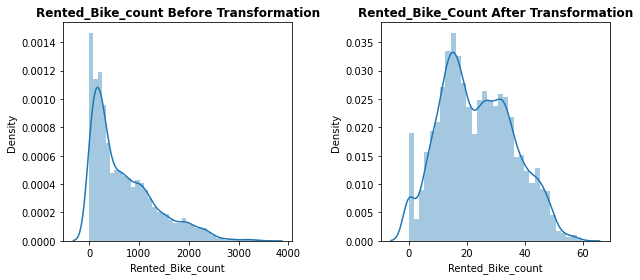

In [43]:
# Since Sqrt transformation gives skewness between -0.5 and 0.5 indicates that, the distribution is fairly symmetrical we will use it :
plt.figure(figsize=(9,4))
plot = plt.subplot(1,2,1)
sns.distplot(df['Rented_Bike_count']).set_title('Rented_Bike_count Before Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['Rented_Bike_count'])).set_title('Rented_Bike_Count After Transformation',weight='bold')
plt.tight_layout()

**After tranformation data is been distributed properly.**

## **Outlier :**

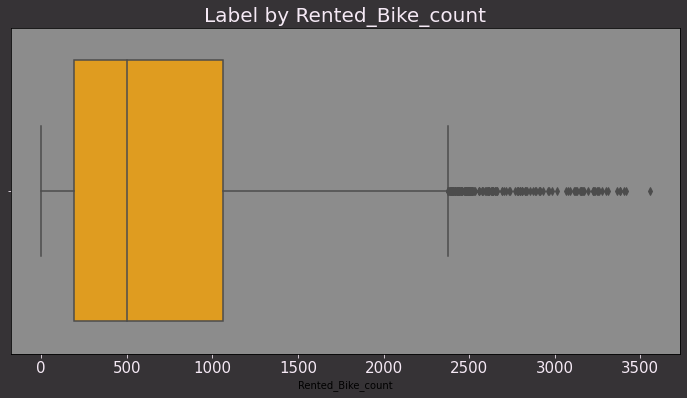

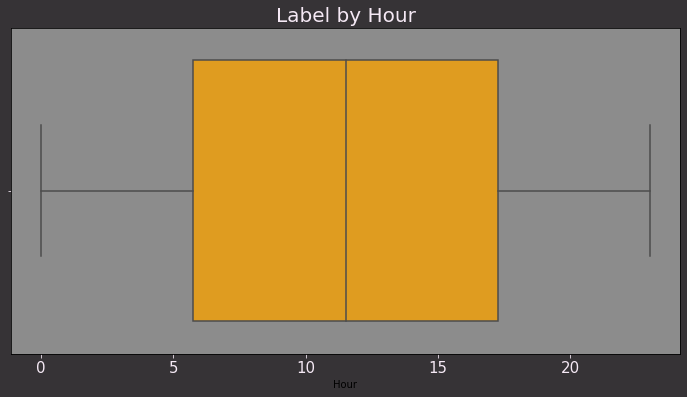

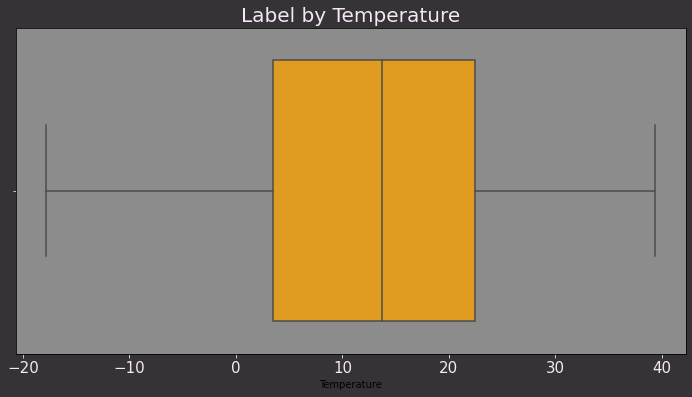

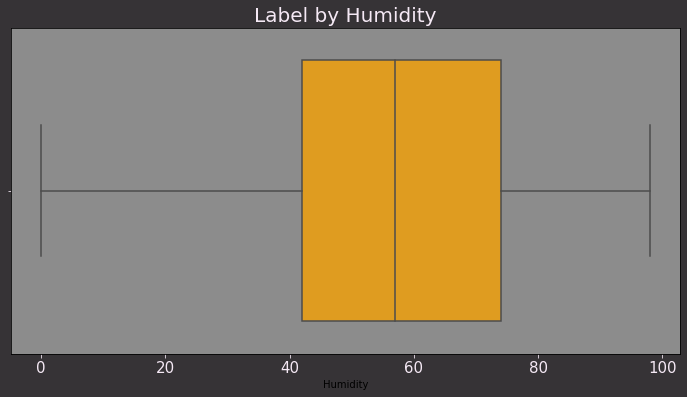

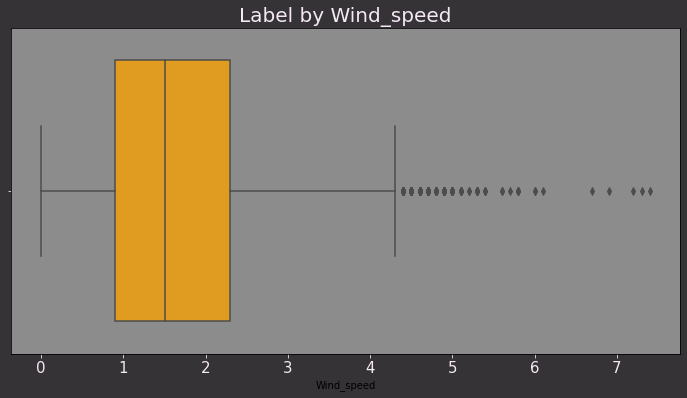

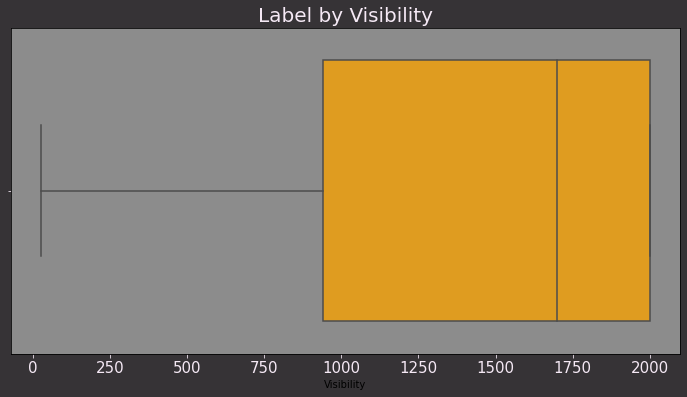

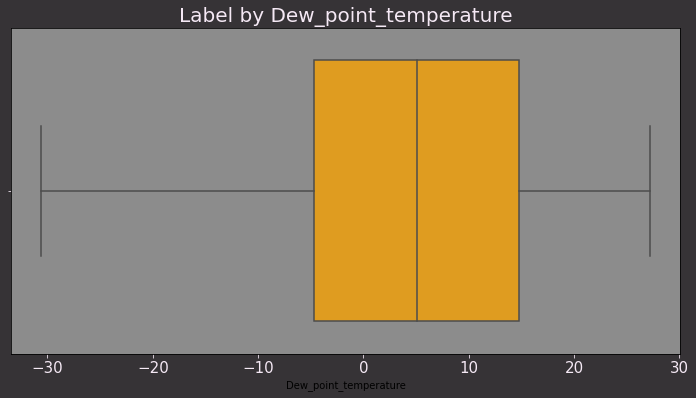

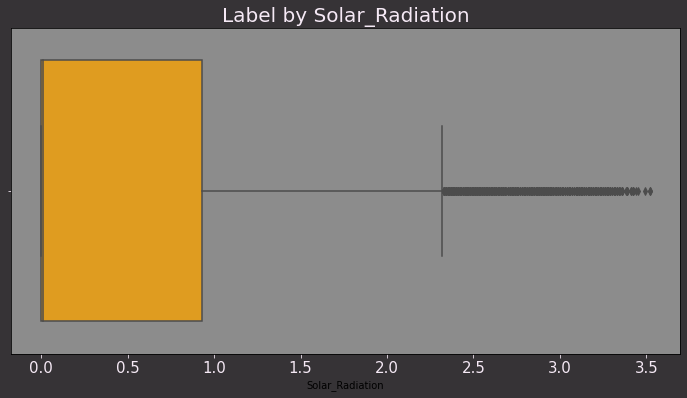

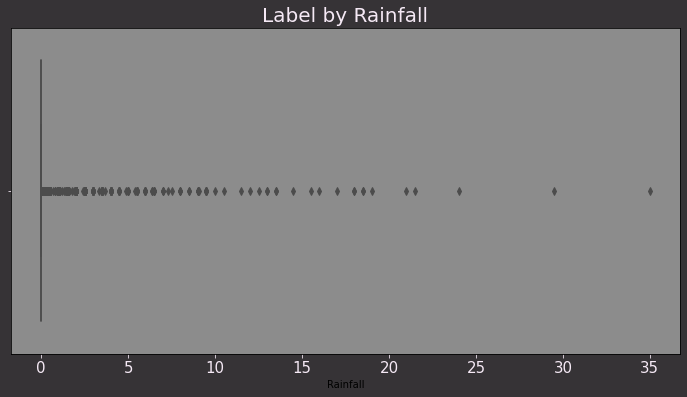

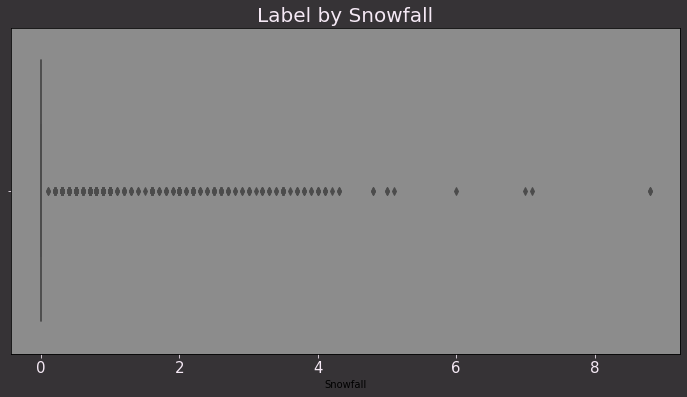

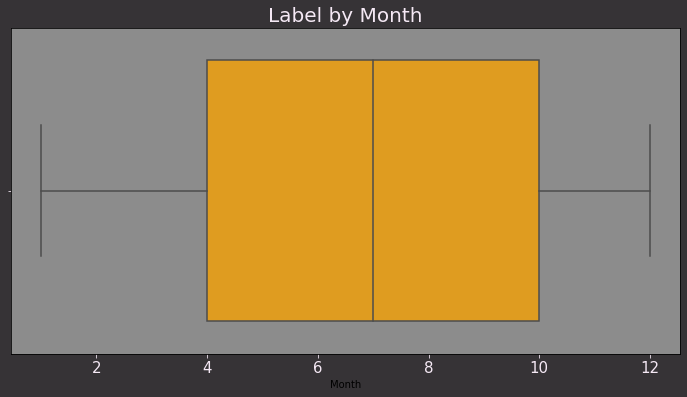

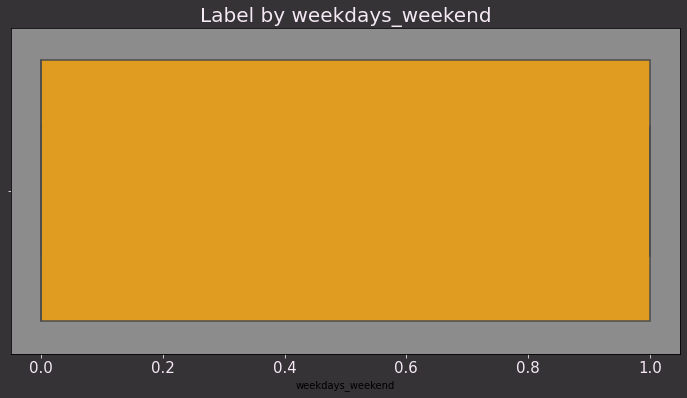

In [44]:
for col in df.describe().columns:
    
    fig, ax = plt.subplots(figsize=(12,6),facecolor="#363336")
    ax.patch.set_facecolor('#8C8C8C')
    sns.boxplot(df[col],color='orange')
    ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
    ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
    ax.set_title('Label by ' + col,color='#F5E9F5', fontsize=20)
    
plt.show()

* **After plotting the boxplot for the outliers in our dataset, we observed that there are outliers present in "Rented Bike Count" as that is our target variable.**

##**Checking of Correlation between variables**

* **We check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables**

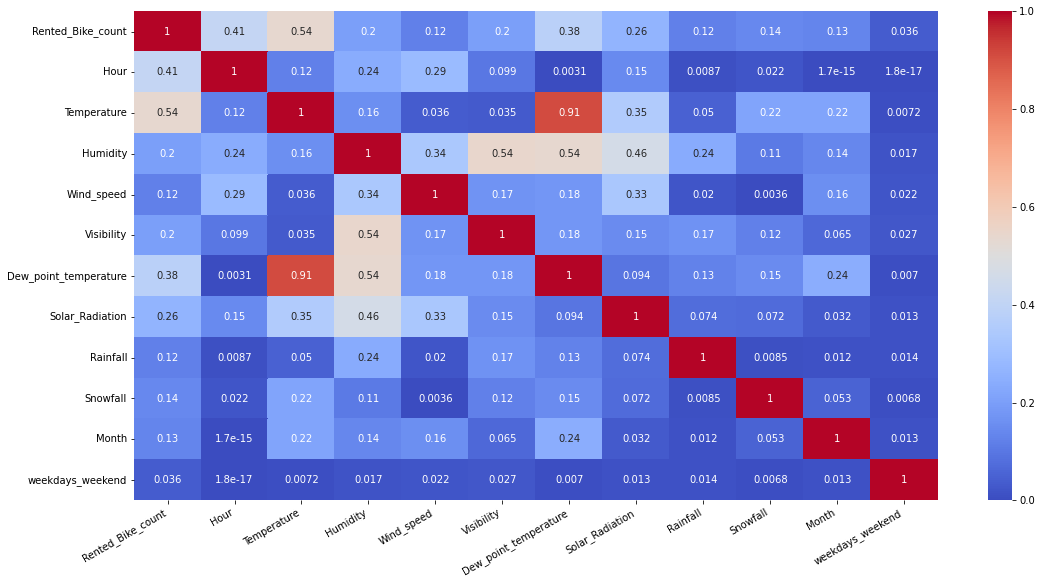

In [45]:
# Checking corelations :
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

* ***From the above correlation heatmap, We see that there is a positive 
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop 1 of this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.***

*  ***Before proceeding further we will first check the collinearity between other variables as well through VIF.***


* **What is Variance Inflation Factor (VIF)?**
 
 VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. In some cases VIF of less than 10 is also acceptable.

 Here, we have performed the VIF calculations for the clarity about the correlation between the features. after that, we have dropped the features which were highly correlated with any other independent features for accurate predictions.

In [46]:
# Calculating Multi-colinearity between the independent variables :
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Making function for VIF calculation :
def cal_VIF(F):
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]
 
   return(VIF)

In [47]:
# Checking the VIF score :
cal_VIF(df[[i for i in numerical_features.describe().columns
              if i not in ['Rented_Bike_count']]])

,variables,VIF
0,Hour,4.425348
1,Temperature,34.919399
2,Humidity,7.003058
3,Wind_speed,4.881602
4,Visibility,9.378738
5,Dew_point_temperature,17.802987
6,Solar_Radiation,2.882967
7,Rainfall,1.082184
8,Snowfall,1.131902
9,Month,5.094506


* **We have observed that there is correlation between Temperature and Dew point Temperature, As Temperature is an important feature as it is significant for the Seasons Column, We will remove Dew point temperature and check the VIF of remaining variables.**

In [48]:
# drop the Dew point temperature column
df= df.drop(['Dew_point_temperature'],axis=1)

In [49]:
# Checking the VIF of the remaining variables :
cal_VIF(df[[i for i in numerical_features.describe().columns
              if i not in ['Rented_Bike_count','Dew_point_temperature']]])

,variables,VIF
0,Hour,3.960112
1,Temperature,3.288623
2,Humidity,6.155420
3,Wind_speed,4.651787
4,Visibility,5.359009
5,Solar_Radiation,2.260940
6,Rainfall,1.080309
7,Snowfall,1.131108
8,Month,5.009301
9,weekdays_weekend,1.380635


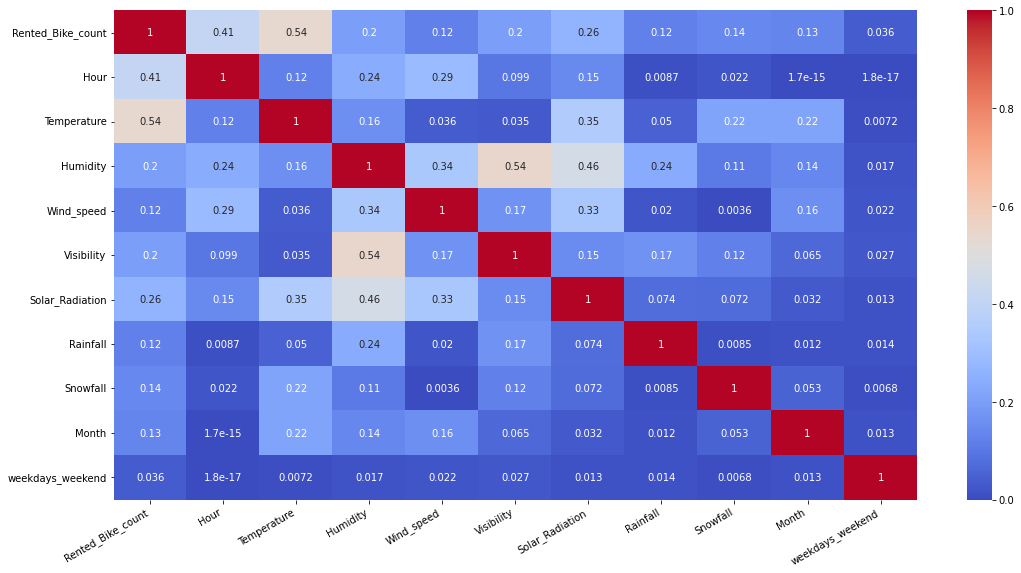

In [50]:
# Checking corelations after droping Dew_point_temperature :
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()



* **Hence,There is no multi-collinearity present in the dataset.** 


In [51]:
# Checking the clean data set :
df.head()

,Rented_Bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


# ***5. Feature Engineering & Data Pre-processing***

### 5.1. Categorical Encoding : One- Hot Encoding

Creating dummy variables :
**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

In [52]:
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_day'], dtype='object')

In [53]:
#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()

,Rented_Bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Month,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_day_Yes
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,0,0,0,1,1,1


In [54]:
df_copy.describe().columns

Index(['Rented_Bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Month',
       'weekdays_weekend', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_day_Yes'],
      dtype='object')

# ***6. Train Test split for regression***

* Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. 

* This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. 
* The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. 

* In this step we will split our data into training and testing set using scikit learn library.


## What is Independent variables (X)?

* ### An independent variable is exactly what it sounds like, a variable that stands alone and isn't changed by the other variables you are trying to measure. It tries to explain the value or effect of the output variable (dependent variable) by creating a relationship between an independent and dependent variable.

* ###  For example, in a plant growth study, the independent variables might be soil moisture (continuous) and type of fertilizer (categorical). 






## What is our Dependent variables (Y) ?

*  The dependent variable (DV) is what you want to use the model to explain or predict. The values of this variable depend on other variables. It is the outcome that you're studying. It's also known as the response variable, outcome variable, and left-hand variable.

* For example, a test score could be a dependent variable because it could change depending on several factors such as how much you studied, how much sleep you got the night before you took the test, or even how hungry you were when you took it.


* Therefore, DV = Rented_Bike_count






In [55]:
# Assigning the value of independent variable (X) and dependent variable (Y) :
X = df_copy.drop(columns=['Rented_Bike_count'], axis=1)
y = np.sqrt(df_copy['Rented_Bike_count'])

In [56]:
# It always a good practice whatever code u execute, print and check it :
X.head()

,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Month,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_day_Yes
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,0,0,0,1,1,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,0,0,0,1,1,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,0,0,0,1,1,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,0,0,0,1,1,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,0,0,0,1,1,1


In [57]:
# It always a good practice whatever code u execute, print and check it :
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_count, dtype: float64

In [58]:
# Creating test and train data-Set :

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 15)
(2190, 15)


In [59]:
df_copy.describe().columns

Index(['Rented_Bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Month',
       'weekdays_weekend', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_day_Yes'],
      dtype='object')

* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned} 
​
  
* R 
2
 =1− 
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.

# ***7. ML Model Implementation***

## **ML Model-1 - Linear Regression.**

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and 
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.

In [60]:
# Model fitting :
reg= LinearRegression().fit(X_train, y_train)

In [61]:
# Check the score :
reg.score(X_train, y_train)

0.6534941355627195

In [62]:
# Checking the coefficeint :
reg.coef_

array([ 4.88503585e-01,  4.81187909e-01, -1.63601253e-01,  8.91045703e-02,
        1.32666793e-04, -8.48934410e-01, -1.47899382e+00,  1.82518884e-02,
        1.57328078e-01, -1.50175761e+00, -1.91528409e+00, -2.51580521e+00,
       -7.14305985e+00,  3.11428120e+00,  2.85562994e+01])

In [63]:
# Get the X_train and X-test value :
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [64]:
# Calculating the Maetrics for Prediction from Training Dataset :
# Calculate MSE :
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

# Calculate RMSE :
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

# Calculate MAE :
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

# Calculate r2 and adjusted r2 :
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 53.35867327246519
RMSE : 7.304702134410765
MAE : 5.6208613504929446
R2 : 0.6534941355627195
Adjusted R2 : 0.6511033407298956


**Looks like our r2 score value is 0.65 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [65]:
# Storing the train-set metrics value in a dataframe for later comparison :
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [66]:
# Calculating the metrics for Prediction from Testing Dataset :
# Calculate MSE :
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

# Calculate RMSE :
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

# Calculate MAE :
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

# Calculate r2 and adjusted r2 :
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 52.92895445231588
RMSE : 7.275228824739183
MAE : 5.6389163639378355
R2 : 0.6649353702337291
Adjusted R2 : 0.6626235167624807


**The r2_score for the test set is 0.66. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity (unequal variance or scatter).**

In [67]:
# Storing the test set metrics value in a dataframe for later comparison :
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

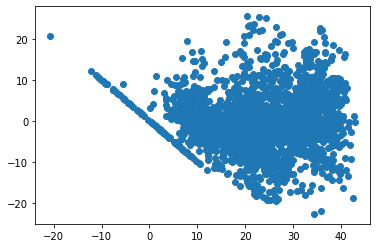

In [68]:
# Visualizing Heteroscadacity Plot :
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

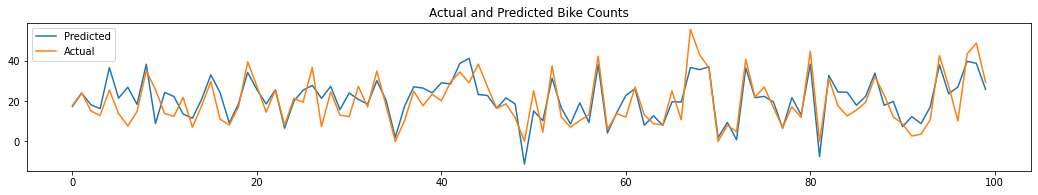

In [69]:
# Visualizing evaluation metrics score chart :
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((y_pred_test)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

## **ML Model-2 - Lasso Regression.**

In [70]:
# Create an instance of Lasso Regression Implementation :
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fit the Lasso model :
lasso.fit(X_train, y_train)

# Create the model score :
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.45182594627157147 0.475318258860282


In [71]:
# Get the X_train and X-test value :
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [72]:
# Calculating the Matrix for Prediction from Training Dataset :
# Calculate MSE :
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

# Calculate RMSE :
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

# Calculate MAE :
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)

# Calculate r2 and adjusted r2 :
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)

Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 80.79609747144657
RMSE : 8.98866494377483
MAE : 6.675898765429622
R2 : 0.475318258860282
Adjusted R2 : 0.4716980996527863


**Looks like our r2 score value is 0.47 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [73]:
# Storing the train set metrics value in a dataframe for later comparison :
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [74]:
# Calculating the Matrix for Prediction from Testing Dataset :
# Calculate MSE :
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

# Calculate RMSE :
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

# Calculate MAE :
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)

# Calculate r2 and adjusted r2 :
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)

Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 86.59308367455162
RMSE : 9.305540482666851
MAE : 6.880927667478645
R2 : 0.45182594627157147
Adjusted R2 : 0.44804369659083254


**The r2_score for the test set is 0.45. This means our linear model is  not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity (unequal variance or scatter).**

In [75]:
# Storing the test set metrics value in a dataframe for later comparison :
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

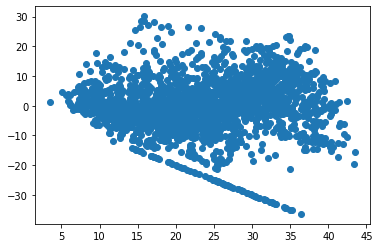

In [76]:
# Visualizing Heteroscadacity Plot :
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

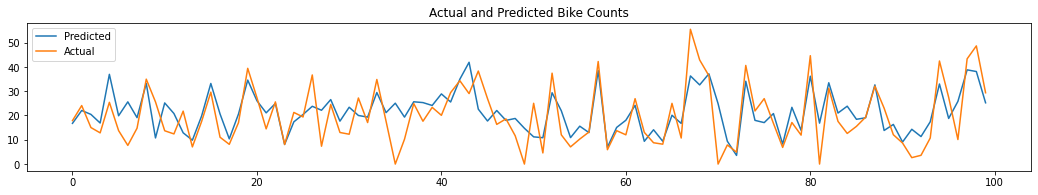

In [77]:
# Visualizing evaluation metrics score chart :
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((y_pred_test_lasso)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

## **ML Model-3 -Ridge Regression.**

In [78]:
ridge= Ridge(alpha=0.1)

In [79]:
# Model fitting :
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [80]:
# Check the score :
ridge.score(X_train, y_train)

0.6534940864422991

In [81]:
# Get the X_train and X-test value :
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [82]:
# Calculating the Maetrics for Prediction from Training Dataset :
# Calculate MSE :
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

# Calculate RMSE :
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

# Calculate MAE :
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)

# Calculate r2 and adjusted r2 :
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)

Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 53.35868083655206
RMSE : 7.304702652165388
MAE : 5.620875846555814
R2 : 0.6534940864422991
Adjusted R2 : 0.6511032912705579


**Looks like our r2 score value is 0.65 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [83]:
# Storing the test set metrics value in a dataframe for later comparison :
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [84]:
# Calculating the Maetrics for Prediction from Testing Dataset :
# Calculate MSE :
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

# Calculate RMSE :
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

# Calculate MAE :
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)

# Calculate r2 and adjusted r2 :
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)

Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.92912590210604
RMSE : 7.275240607849753
MAE : 5.639001057070362
R2 : 0.664934284877688
Adjusted R2 : 0.6626224239177825


**The r2_score for the test set is 0.66. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity (unequal variance or scatter).**

In [85]:
# Storing the test set metrics value in a dataframe for later comparison :
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

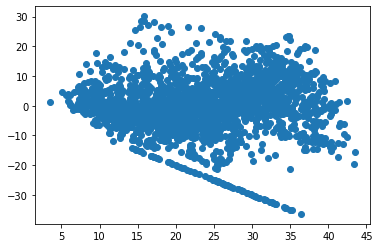

In [86]:
# Visualizing Heteroscadacity Plot :
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

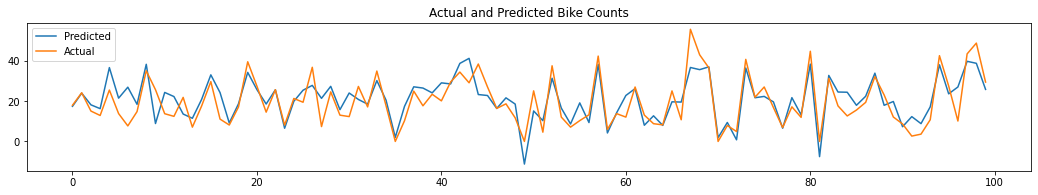

In [87]:
# Visualizing evaluation metrics score chart :
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((y_pred_test_ridge)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

## **ML Model-4 - Elastic Net Regression.**

In [88]:
# a * L1 + b * L2
# alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [89]:
# Model Fitting :
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [90]:
# Check the score :
elasticnet.score(X_train, y_train)

0.5820656267064467

In [91]:
# Get the X_train and X-test value :
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [92]:
# Calculating the Maetrics for Prediction from Training Dataset :
# Calculate MSE :
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

# Calculate RMSE :
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

# Calculate MAE :
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)

# Calculate r2 and adjusted r2 :
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)

Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 64.35799783682944
RMSE : 8.022343662348893
MAE : 6.102150513245649
R2 : 0.5820656267064467
Adjusted R2 : 0.5791819948759944


**Looks like our r2 score value is 0.58 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [93]:
# Storing the train set metrics value in a dataframe for later comparison :
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [94]:
# Calculating the Maetrics for Prediction from Testing Dataset :
# Calculate MSE :
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

# Calculate RMSE :
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

# Calculate MAE :
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)

# Calculate r2 and adjusted r2 :
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)

Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 66.74616654381272
RMSE : 8.169832712106945
MAE : 6.219473483135306
R2 : 0.5774660615775318
Adjusted R2 : 0.5745506940171192


**The r2_score for the test set is 0.57. This means our linear model is  performing good on the data-set. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [95]:
# Storing the test set metrics value in a dataframe for later comparison :
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

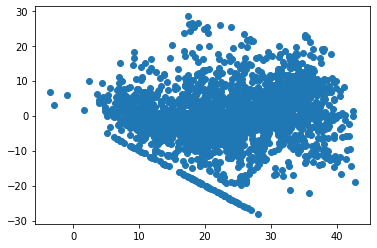

In [96]:
# Visualizing Heteroscadacity Plot :
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

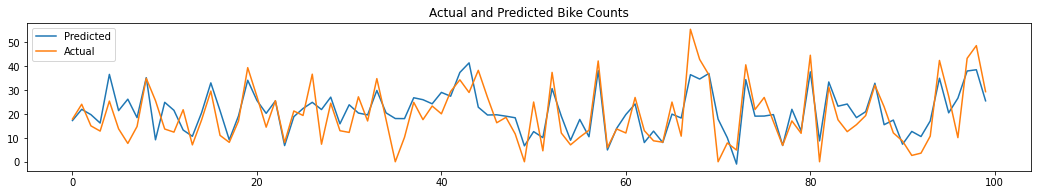

In [97]:
# Visualizing evaluation metrics score chart :
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((y_pred_test_en)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

## **ML Model-5 - Decision Tree.**

In [98]:
# Model fitting :
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,random_state =0)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100, random_state=0)

In [99]:
# Get the X_train and X-test value :
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [100]:
# Calculating the Maetrics for Prediction from Training Dataset :

print("Model Score:",decision_regressor.score(X_train,y_train))

# Calculate MSE :
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

# Calculate RMSE :
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

# calculate MAE :
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

# Calculate r2 and adjusted r2 :
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)

Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8484460760890519
MSE : 23.337891617670074
RMSE : 4.830930719609843
MAE : 3.3786138432702284
R2 : 0.8484460760890519
Adjusted R2 : 0.8474003958412762


**Looks like our r2 score value is 0.84 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [101]:
# Storing the train set metrics value in a dataframe for later comparison :
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [102]:
# Calculating the metrics for Prediction from Testing Dataset :
# Calculate MSE :
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

# Calculate RMSE :
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

# Calculate MAE :
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)

# Calculate r2 and adjusted r2 :
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)

Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 28.599665943540618
RMSE : 5.347865550249054
MAE : 3.6657469425652645
R2 : 0.8189509583181994
Adjusted R2 : 0.8177017698981318


**The r2_score for the test set is 0.81. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


In [103]:
# Storing the test set metrics value in a dataframe for later comparison :
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

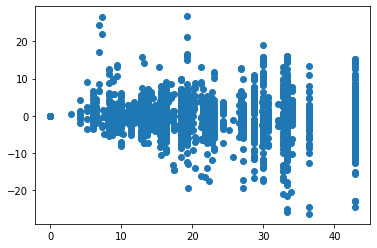

In [104]:
# Visualizing Heteroscadacity Plot :
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

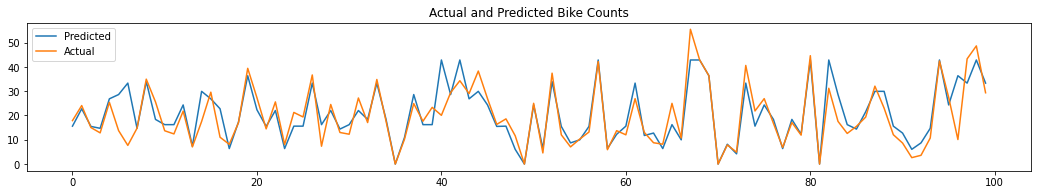

In [105]:
# Visualizing evaluation metrics score chart :
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((y_pred_test_d)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

## **ML Model-6 - Random Forest.**

In [106]:
# Create an instance of the Random Forest Regressor :
rf_model = RandomForestRegressor()

In [107]:
# Model fiting :
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [108]:
# Making predictions on train and test data :
y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [109]:
# Calculating the metrics for Prediction from Training Dataset :
print("Model Score:",rf_model.score(X_train,y_train))

# Calculate MSE :
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

# Calculate RMSE :
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

# Calculate MAE :
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)

# Calculate r2 and adjusted r2 :
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)

Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.991704501020741
MSE : 1.277429518790919
RMSE : 1.1302342760644446
MAE : 0.7149703347890926
R2 : 0.991704501020741
Adjusted R2 : 0.9916472643672503


**Looks like our r2 score value is 0.99 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [110]:
# Storing the train set metrics value in a dataframe for later comparison :
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [111]:
# Calculating the metrics for Prediction from Testing Dataset :
# Calculate MSE :
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

# Calculate RMSE :
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

# Calculate MAE :
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)

# Calculate r2 and adjusted r2 :
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)

Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 9.94094631896306
RMSE : 3.152926627589526
MAE : 2.0090217778597417
R2 : 0.9370692368221532
Adjusted R2 : 0.9366350319244219


**The r2_score for the test set is 0.93. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity (unequal variance or scatter).**

In [112]:
# Storing the test set metrics value in a dataframe for later comparison :
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

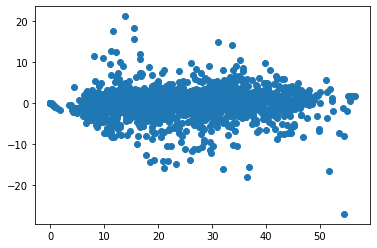

In [113]:
# Visualizing Heteroscadacity Plot :
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

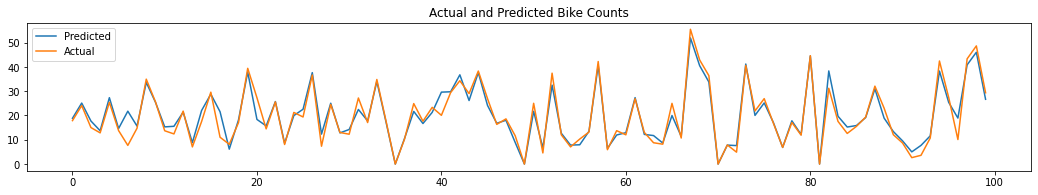

In [114]:
# Visualizing evaluation metrics score chart :
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((y_pred_test_r)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

In [115]:
# Feature Importance :
rf_model.feature_importances_

array([0.24288785, 0.2814895 , 0.10904176, 0.00984216, 0.01079308,
       0.03935986, 0.05845646, 0.00161949, 0.01881331, 0.02180491,
       0.00132252, 0.00128864, 0.05093916, 0.00464564, 0.14769565])

In [116]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [117]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Temperature,0.28
0,Hour,0.24
14,Functioning_day_Yes,0.15
2,Humidity,0.11
6,Rainfall,0.06
12,Seasons_Winter,0.05
5,Solar_Radiation,0.04
8,Month,0.02
9,weekdays_weekend,0.02
3,Wind_speed,0.01


In [118]:
# Model fiting :
rf_model.fit(X_train,y_train)

features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

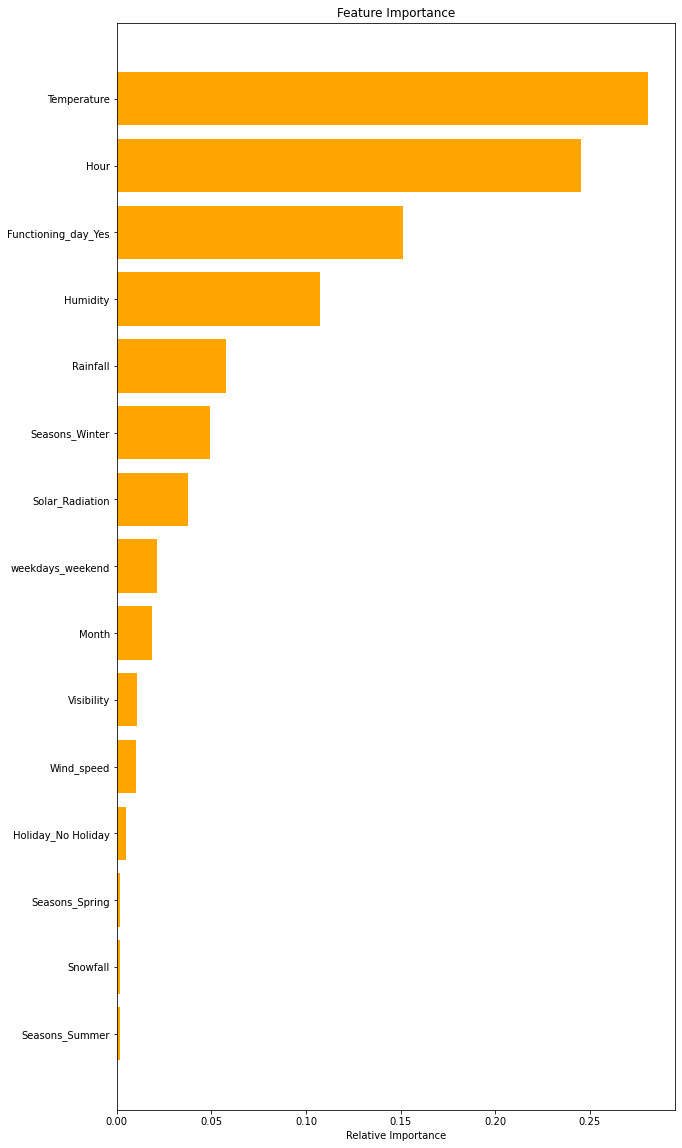

In [119]:
# Visualizing the feature importance graph :
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **ML Model-7 - Gradient Boosting.**

In [120]:
# Create an instance of the Gradient Boosting Regressor :
gb_model = GradientBoostingRegressor()

In [121]:
# Model fiting :
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [122]:
# Making predictions on train and test data :
y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [123]:
# Calculating the metrics for Prediction from Training Dataset :
print("Model Score:",gb_model.score(X_train,y_train))

# Calculate MSE :
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

# Calculate RMSE :
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

# Calculate MAE :
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)

# Calculate r2 and adjusted r2 :
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)

Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8989952735648581
MSE : 15.553786385635599
RMSE : 3.9438288991328716
MAE : 2.811795483263817
R2 : 0.8989952735648581
Adjusted R2 : 0.898298368828645


**Looks like our r2 score value is 0.89 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [124]:
# Storing the train set metrics value in a dataframe for later comparison :
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [125]:
# Calculating the metrics for Prediction from Testing Dataset :
# Calculate MSE :
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

# Calculate RMSE :
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

# Calculate MAE :
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)

# Calculate r2 and adjusted r2 :
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)

Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 17.77887576395422
RMSE : 4.216500416690863
MAE : 3.00080212836249
R2 : 0.8874515378746689
Adjusted R2 : 0.8866749845481372


**The r2_score for the test set is 0.88. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity (unequal variance or scatter).**


In [126]:
# Storing the test set metrics value in a dataframe for later comparison :
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

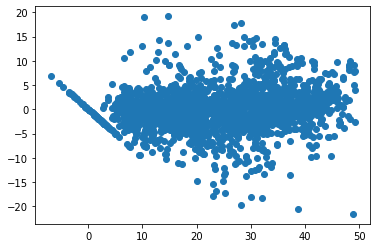

In [127]:
# Visualizing Heteroscadacity Plot :
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

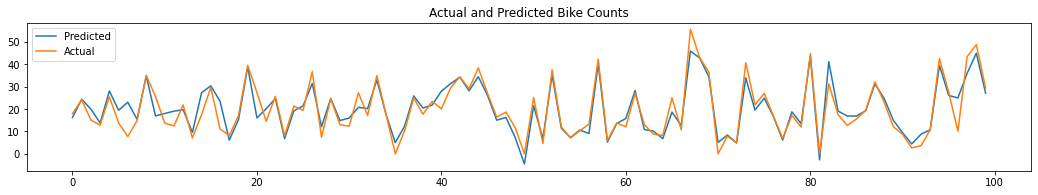

In [128]:
# Visualizing evaluation metrics score chart :
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((y_pred_test_g)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

In [129]:
# Feature importance :
gb_model.feature_importances_

array([2.48756377e-01, 2.95243189e-01, 1.05979827e-01, 3.40270114e-04,
       5.44703299e-04, 3.13447735e-02, 6.31532733e-02, 6.73475523e-04,
       2.37899551e-02, 8.86234664e-03, 3.23580826e-04, 1.61743284e-04,
       5.18555761e-02, 2.31675745e-03, 1.66654151e-01])

In [130]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [131]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Temperature,0.30
0,Hour,0.25
14,Functioning_day_Yes,0.17
2,Humidity,0.11
6,Rainfall,0.06
12,Seasons_Winter,0.05
5,Solar_Radiation,0.03
8,Month,0.02
9,weekdays_weekend,0.01
3,Wind_speed,0.00


In [132]:
# Model fiting :
gb_model.fit(X_train,y_train)

features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

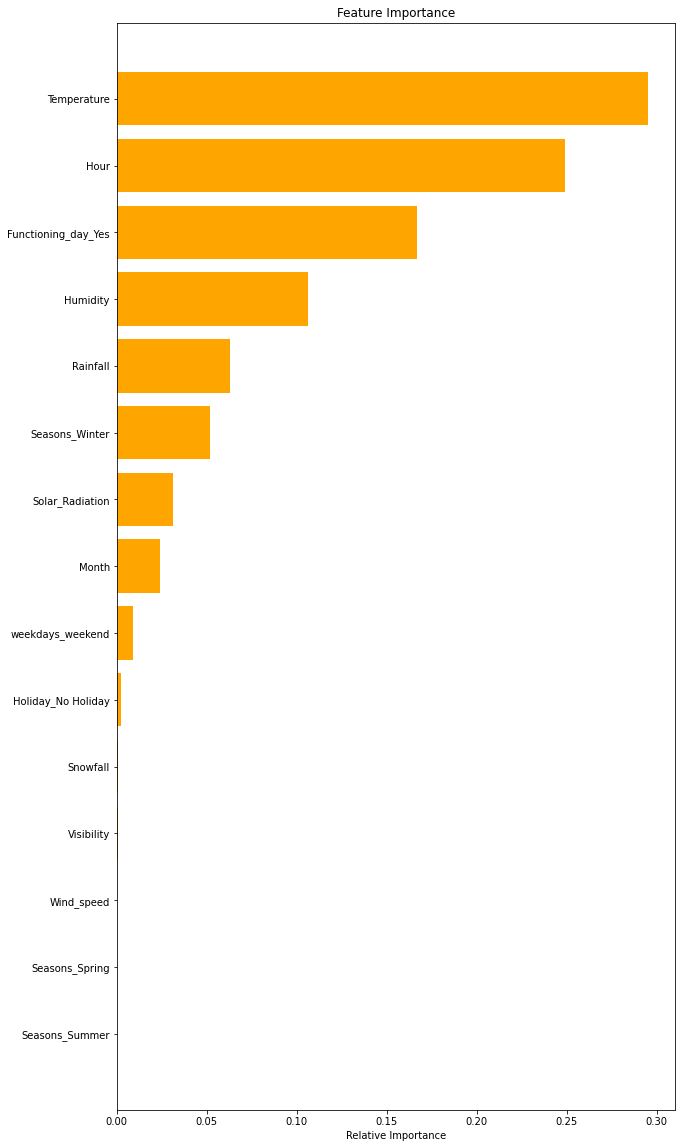

In [133]:
# Visualizing the feature importance graph :
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#**8. Hyperparameter tuning** 

**Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.**

##**What is hyperparameter?**

* Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set.
*That combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors.

## **GridSearch CV**

* GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.


##**Gradient Boosting Regressor with GridSearchCV**

In [134]:
# Provide the range of values for chosen hyper-parameters.
# Number of trees :
n_estimators = [50,80,100]

# Maximum depth of trees :
max_depth = [4,6,8]

# Minimum number of samples required to split a node :
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node :
min_samples_leaf = [40,50]

# Hyperparameter Grid :
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

param_dict              

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

### **Importing Gradient Boosting Regressor**

In [135]:
from sklearn.model_selection import GridSearchCV

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [136]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=100)

In [137]:
gb_optimal_model = gb_grid.best_estimator_

In [138]:
# Making predictions on train and test data :
y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [139]:
# Calculating the metrics for Prediction from Training Dataset :
print("Model Score:",gb_optimal_model.score(X_train,y_train))

MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)

MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)

r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)

Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9659407651298495
MSE : 5.244804697022569
RMSE : 2.290153858810051
MAE : 1.5002265569277358
R2 : 0.9659407651298495
Adjusted R2 : 0.9657057658092183


In [140]:
# Storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [141]:
# Calculating the metrics for Prediction from Testing Dataset :
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)

MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)

r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)

Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 9.492526638774379
RMSE : 3.080994423684402
MAE : 2.00213559129041
R2 : 0.9399079396772737
Adjusted R2 : 0.9394933210457922


In [142]:
# Storing the test set metrics value in a dataframe for later comparison :
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

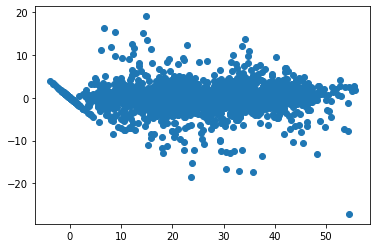

In [143]:
# Visualizing Heteroscadacity Plot :
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [144]:
# Feature importance :
gb_optimal_model.feature_importances_

array([0.25966802, 0.27846051, 0.123599  , 0.00257764, 0.0042605 ,
       0.02445375, 0.05507674, 0.00110178, 0.02079667, 0.02346813,
       0.00051701, 0.001131  , 0.05510152, 0.00289102, 0.14689671])

In [145]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [146]:
# Checking the features :
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Temperature,0.28
0,Hour,0.26
14,Functioning_day_Yes,0.15
2,Humidity,0.12
6,Rainfall,0.06
12,Seasons_Winter,0.06
5,Solar_Radiation,0.02
8,Month,0.02
9,weekdays_weekend,0.02
3,Wind_speed,0.00


In [147]:
# Model fiting :
gb_model.fit(X_train,y_train)

features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

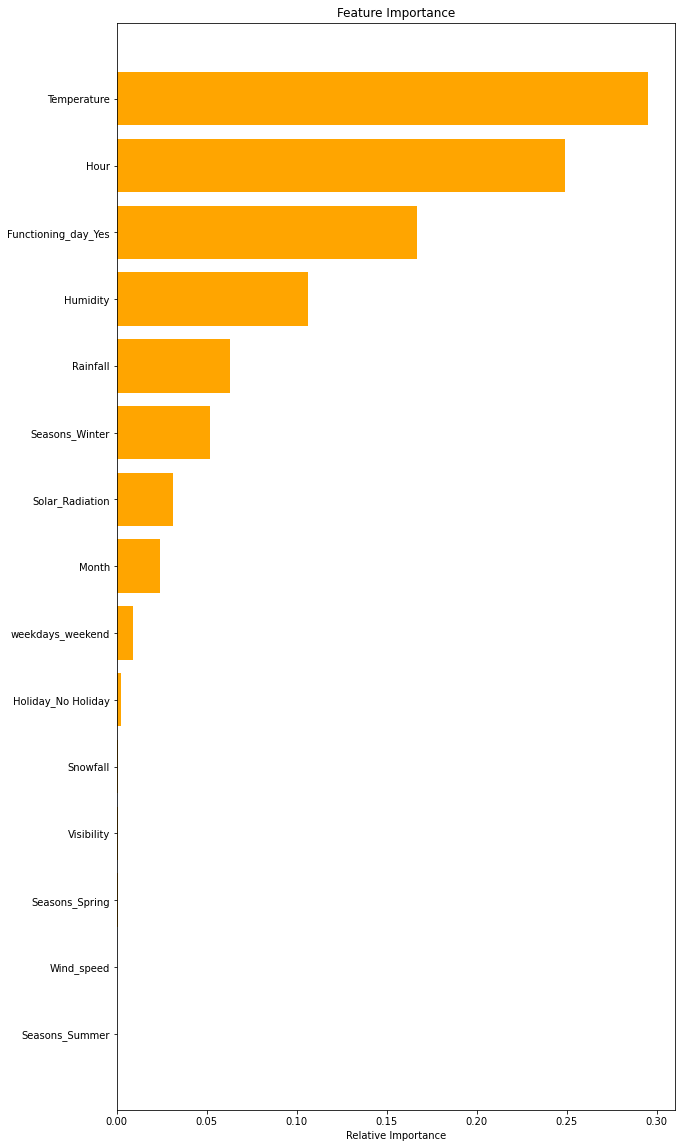

In [148]:
# Visualizing the feature importance graph :
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**9. CONCLUSION** 

## Summary of the entire journey of the model :

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 7 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [149]:
# Displaying the results of evaluation metric values for all models :
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   5.621  53.359  7.305   
             1                Lasso regression   6.676  80.796  8.989   
             2                Ridge regression   5.621  53.359  7.305   
             3          Elastic net regression   6.102  64.358  8.022   
             4        Dicision tree regression   3.379  23.338  4.831   
             5        Random forest regression   0.715   1.277  1.130   
             6    Gradient boosting regression   2.812  15.554  3.944   
             7  Gradient Boosting gridsearchcv   1.500   5.245  2.290   
Test set     0               Linear regression   5.639  52.929  7.275   
             1                Lasso regression   6.881  86.593  9.306   
             2                Ridge regression   5.639  52.929  7.275   
             3      Elastic net regression Test  6.219  66.746  8.170   
             4        Dicision tree regression   3.666  28.600  5.348   
             5        Random forest regression   2.009   9.941  3.153   
             6    Gradient boosting regression   3.001  17.779  4.217   
             7  Gradient Boosting gridsearchcv   2.002   9.493  3.081   

                R2_score  Adjusted R2  
Training set 0     0.653         0.65  
             1     0.475         0.47  
             2     0.653         0.65  
             3     0.582         0.58  
             4     0.848         0.85  
             5     0.992         0.99  
             6     0.899         0.90  
             7     0.966         0.97  
Test set     0     0.665         0.66  
             1     0.452         0.45  
             2     0.665         0.66  
             3     0.577         0.57  
             4     0.819         0.82  
             5     0.937         0.94  
             6     0.887         0.89  
             7     0.940         0.94

• No overfitting is seen.

• Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 99% and 97% recpectively for Train Set and 94% and 94% for the Test set.

• We can deploy this model.

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.